酶活性预测实战
1、基于T-R-train.csv数据，建立线性回归模型，计算其在T-R-test.csv数据上的2分数,可视化模型预测结果
2、加入多项式特征(2次、5次)建立回归模型
3、计算多项式回归模型对测试数据进行预测的2分数, 判断哪个模型预测更准确
4、可视化多项式回归模型数据预测结果判断哪个模型预测更准确

In [2]:
#load data
import pandas as pd
import numpy as np

data = pd.read_csv('enzyme_activity.csv')
data

,T,rate
0,0.000000,-1.333085
1,0.808081,1.408436
2,1.616162,-1.766201
3,2.424242,0.527980
4,3.232323,1.289526
...,...,...
95,76.767677,0.573711
96,77.575758,2.933470
97,78.383838,0.769183
98,79.191919,-1.576826


In [4]:
#define x
x_tran = data.loc[:, 'T']
y_tran = data.loc[:, 'rate']



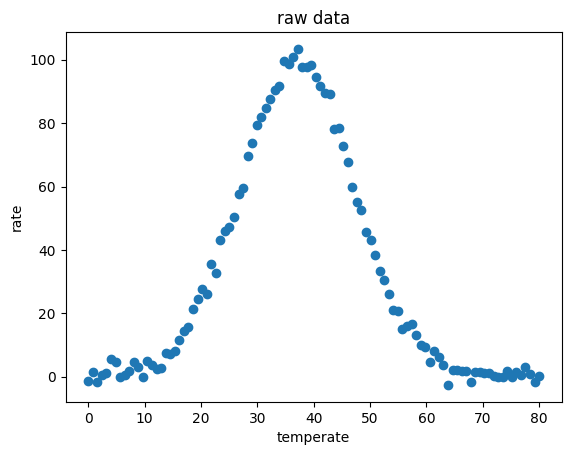

In [5]:
#show x y
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(x_tran, y_tran)
plt.title('raw data')
plt.xlabel('temperate')
plt.ylabel('rate')
plt.show()


In [7]:
x_tran = np.array(x_tran).reshape(-1, 1)
y_tran = np.array(y_tran).reshape(-1, 1)

In [8]:
#linear regression model prediction
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(x_tran, y_tran)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
#load test data
data_test = pd.read_csv('enzyme_activity_test10.csv')
x_test = data_test.loc[:, 'T']
y_test = data_test.loc[:, 'rate']

x_test = np.array(x_test).reshape(-1,1)

In [12]:
#predict
y_train_predict = lr1.predict(x_tran)
y_test_predict = lr1.predict(x_test)

from sklearn.metrics import r2_score

r2_train = r2_score(y_tran, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

print(r2_train, r2_test)

0.012872073906011527 -0.005859804804162261


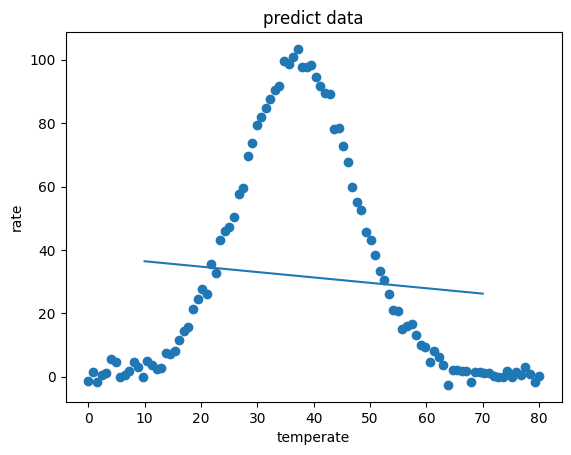

In [14]:
#generate new data

x_range = np.linspace(10,70, 300).reshape(-1, 1)
y_range_predict = lr1.predict(x_range)

fig2 = plt.figure()
plt.plot(x_range, y_range_predict)
plt.scatter(x_tran, y_tran)
plt.title('predict data')
plt.xlabel('temperate')
plt.ylabel('rate')
plt.show()

In [ ]:
#多项式模型
#生成数据
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
x_2_tran = poly2.fit_transform(x_tran)
x_2_test = poly2.transform(x_test)

print(x_2_tran)
#生成三项了 a + bx1 +cx1*x1

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 8.08080808e-01 6.52994592e-01]
 [1.00000000e+00 1.61616162e+00 2.61197837e+00]
 [1.00000000e+00 2.42424242e+00 5.87695133e+00]
 [1.00000000e+00 3.23232323e+00 1.04479135e+01]
 [1.00000000e+00 4.04040404e+00 1.63248648e+01]
 [1.00000000e+00 4.84848485e+00 2.35078053e+01]
 [1.00000000e+00 5.65656566e+00 3.19967350e+01]
 [1.00000000e+00 6.46464646e+00 4.17916539e+01]
 [1.00000000e+00 7.27272727e+00 5.28925620e+01]
 [1.00000000e+00 8.08080808e+00 6.52994592e+01]
 [1.00000000e+00 8.88888889e+00 7.90123457e+01]
 [1.00000000e+00 9.69696970e+00 9.40312213e+01]
 [1.00000000e+00 1.05050505e+01 1.10356086e+02]
 [1.00000000e+00 1.13131313e+01 1.27986940e+02]
 [1.00000000e+00 1.21212121e+01 1.46923783e+02]
 [1.00000000e+00 1.29292929e+01 1.67166616e+02]
 [1.00000000e+00 1.37373737e+01 1.88715437e+02]
 [1.00000000e+00 1.45454545e+01 2.11570248e+02]
 [1.00000000e+00 1.53535354e+01 2.35731048e+02]
 [1.00000000e+00 1.61616162e+01 2.611978

In [16]:
lr2 = LinearRegression()
lr2.fit(x_2_tran, y_tran)

y_2_tran_predict = lr2.predict(x_2_tran)
y_2_test_predict = lr2.predict(x_2_test)

r2_2_train = r2_score(y_tran, y_2_tran_predict)
r2_2_test = r2_score(y_test, y_2_test_predict)
print(r2_2_train, r2_2_test)

0.6353325726555492 0.5471032585380856


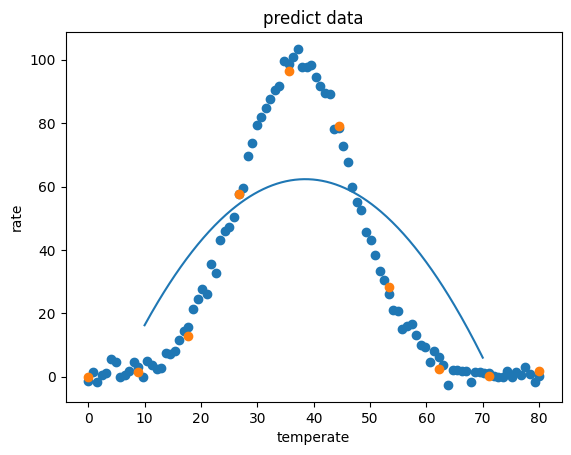

In [ ]:
#show
x_2_range = np.linspace(10,70, 300).reshape(-1, 1)
x_2_range = poly2.transform(x_2_range)
y_2_range_predict = lr2.predict(x_2_range)

fig3 = plt.figure()
plt.plot(x_range, y_2_range_predict)
plt.scatter(x_tran, y_tran)
plt.scatter(x_test, y_test)
plt.title('predict 2 data')
plt.xlabel('temperate')
plt.ylabel('rate')
plt.show()

In [36]:
poly5 = PolynomialFeatures(degree=10)
x_5_tran = poly5.fit_transform(x_tran)
x_5_test = poly5.transform(x_test)

lr5 = LinearRegression()
lr5.fit(x_5_tran, y_tran)

y_5_tran_predict = lr5.predict(x_5_tran)
y_5_test_predict = lr5.predict(x_5_test)

r2_5_train = r2_score(y_tran, y_5_tran_predict)
r2_5_test = r2_score(y_test, y_5_test_predict)
print(r2_5_train, r2_5_test)

0.9919498890531295 0.9949946855063552


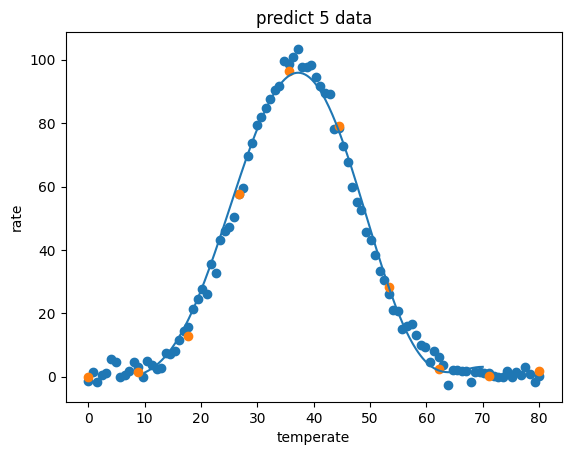

In [37]:
x_5_range = np.linspace(10,70, 300).reshape(-1, 1)
x_5_range = poly5.transform(x_5_range)
y_5_range_predict = lr5.predict(x_5_range)

fig4 = plt.figure()
plt.plot(x_range, y_5_range_predict)
plt.scatter(x_tran, y_tran)
plt.scatter(x_test, y_test)
plt.title('predict 5 data')
plt.xlabel('temperate')
plt.ylabel('rate')
plt.show()